In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [2]:
path = "./TEST/"
clip_path = "./TEST/ScreamingPiha2.wav"
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")

In [3]:
# Example parameters for TweetyNET
isolation_parameters = [
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "simple",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    }, 
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "stack",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    }, 
    {
    "model" : "tweetynet",
    "tweety_output": False,
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
    }
]

### Spectrogram Testing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[  0.   0.   0. ...  -5.  77. 133.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[-1.1037528e-03  4.0041700e-02  5.1937710e-02 ...  1.1304269e

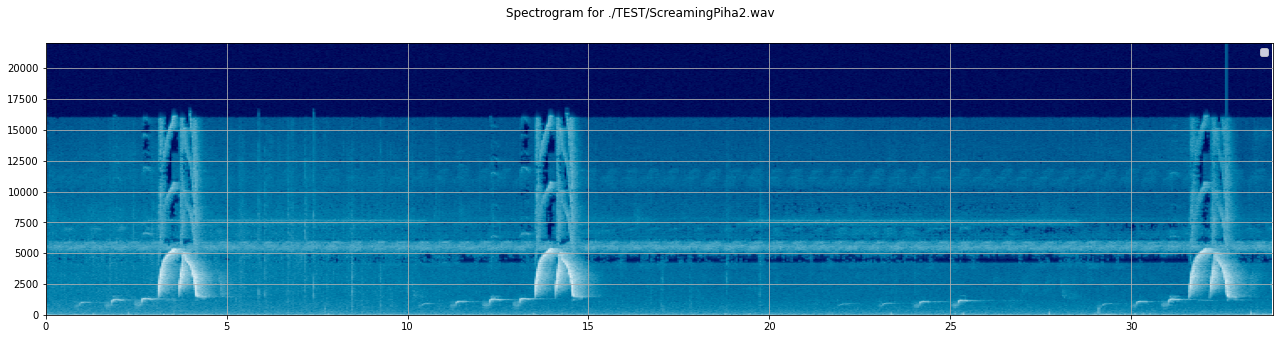

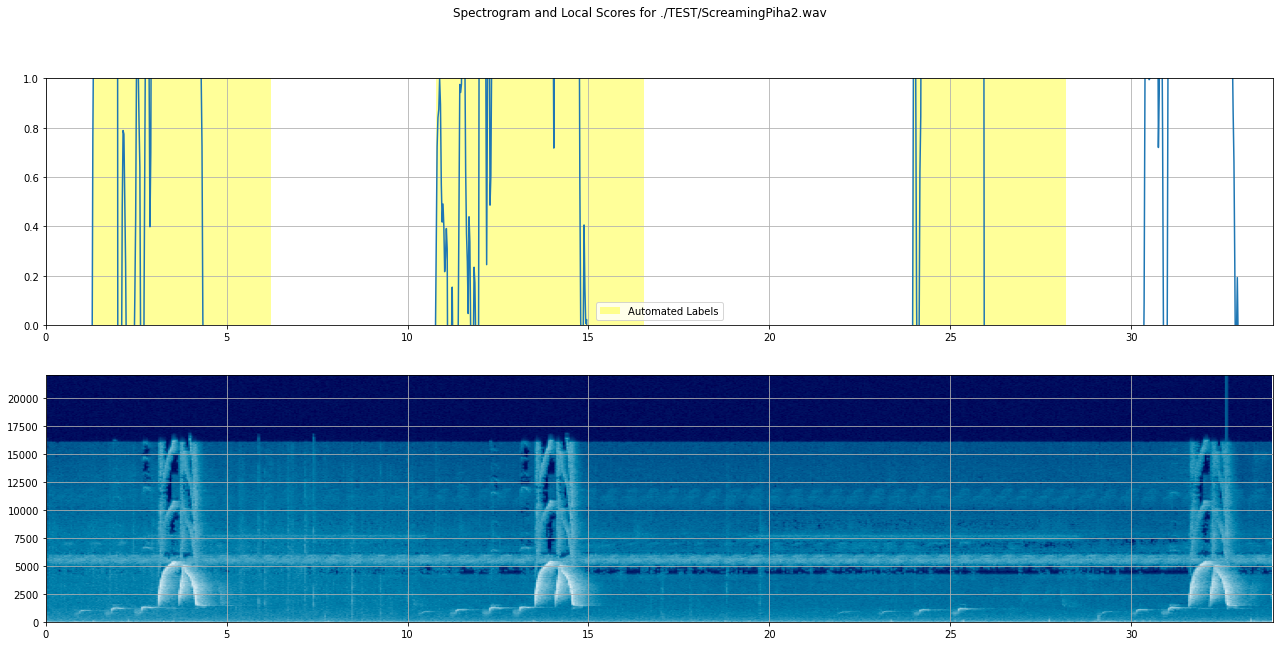

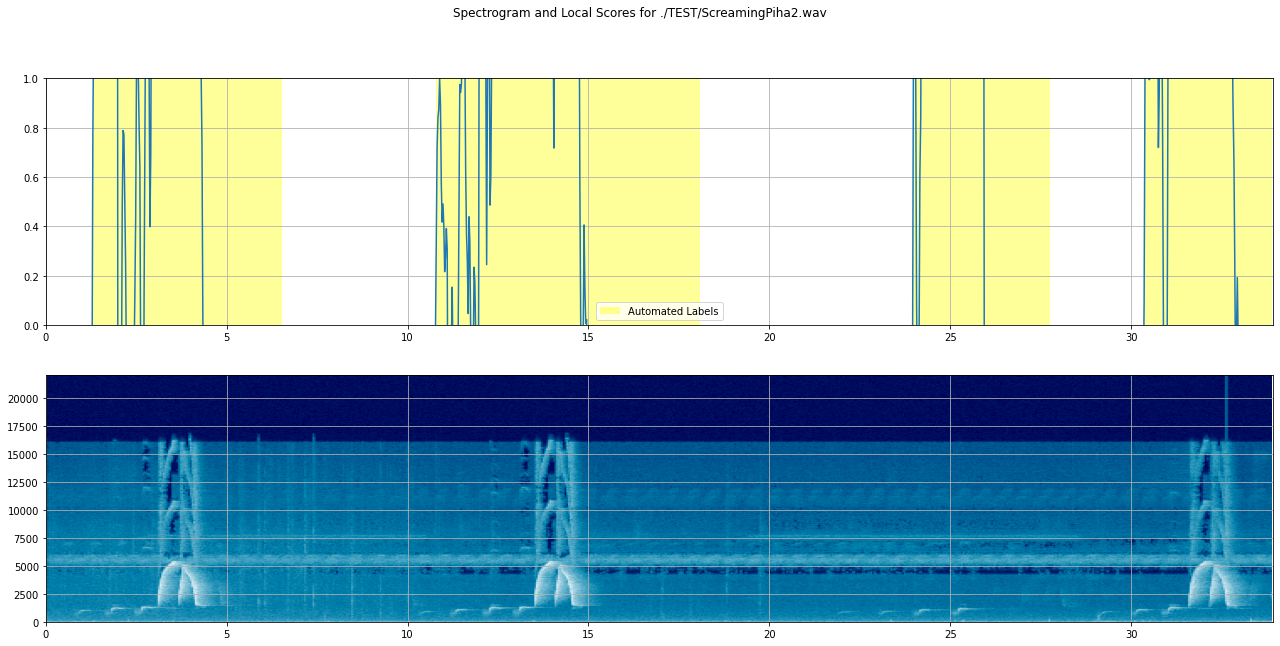

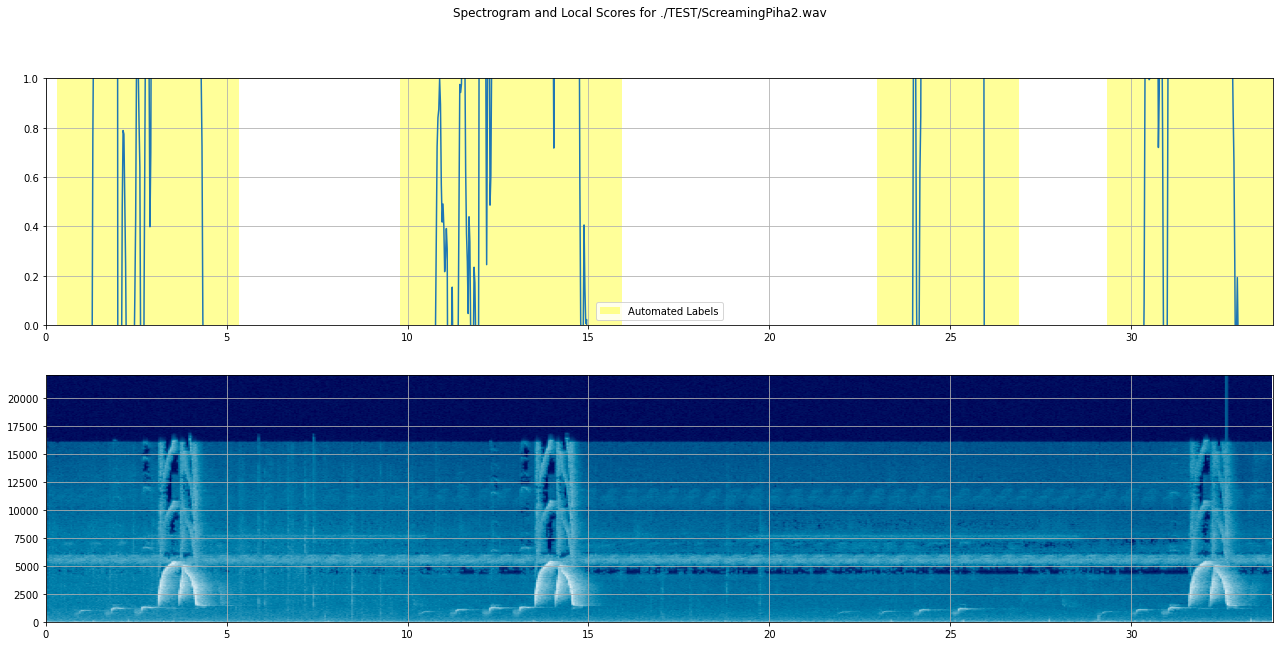

In [13]:
spectrogram_visualization(clip_path)
for i in isolation_parameters: 
    automated_df = generate_automated_labels(path,i);
    spectrogram_visualization(clip_path,automated_df = True, isolation_parameters = i)

### Histogram visualization of Annotation Length

/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[  0.   0.   0. ...  -5.  77. 133.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[-1.1037528e-03  4.0041700e-02  5.1937710e-02 ...  1.1304269e+00
  5.6555068e-01  1.3367674e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_f

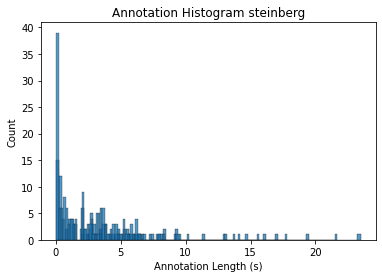

In [14]:
for i in isolation_parameters: 
    automated_df = generate_automated_labels(path,i);
    annotation_duration_histogram(automated_df, n_bins = 100, title = "Annotation Histogram " + i["technique"])

### Statistic compairsion between techinques

In [12]:
datas = []

for i in isolation_parameters:
    print("progression/in progress: " + i["technique"])
    datas.append("=======================================================")
    datas.append(i["technique"])
    automated_df = generate_automated_labels(path,i);
    
    datas.append("general")
    clip_statistics_df = clip_statistics(automated_df,manual_df, stats_type = "general")
    datas.append(global_statistics(clip_statistics_df))
    
    datas.append("\n")
    datas.append("IoU")
    clip_statistics_df = clip_statistics(automated_df,manual_df, stats_type = "IoU", threshold=0.5)
    datas.append(global_statistics(clip_statistics_df))
    
for data in datas:
    print(data)
    

progression/in progress: simple


/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[  0.   0.   0. ...  -5.  77. 133.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
/Users/vanessasalgado/Desktop/E2E-Acoustics.nosync/PyHa/PyHa/tweetynet_package/tweetynet/TweetyNetAudio.py:163: FutureWarning: Pass y=[-1.1037528e-03  4.0041700e-02  5.1937710e-02 ...  1.1304269e+00
  5.6555068e-01  1.3367674e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data, sr=fs, n_fft=n_f

Division by zero setting precision, recall, and f1 to zero on ScreamingPiha8.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha3.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha2.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha5.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha4.wav
progression/in progress: stack
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha10.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha4.wav
progression/in progress: steinberg
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha9.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha8.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha11.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha3.wav
Division by zero setting precision, recal